In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

#Import CSV as dataframe
incident_data = pd.read_csv('Resources/Combined_Table.csv')
incident_data.head()

,Incident_ID,Company,Incident_Date,Ride_Name,Theme_Park,Age,Gender,Description,Pre_Existing_Condition,Passed_Away,Before_During_After,Lat_Long,Lat,Long
0,1,Universal,12/29/2001,Caro-Seuss-el,Islands of Adventure,52,F,broken arm,N,N,Not Specified,"28.473019479946934, -81.46912794980811",28.473019,-81.469128
1,2,Disney World,1/4/2002,The Twilight Zone Tower of Terror,Hollywood Studios,47,F,"anxiety & claustrophobia, atrial fibrilation",N,N,Not Specified,"28.360382462440796, -81.5598948783851",28.360382,-81.559895
2,3,Universal,2/10/2002,Dudley Do Rights Ripsaw Falls,Islands of Adventure,55,F,complained of lower back pain.,N,N,Not Specified,"28.469371941346193, -81.4714516228227",28.469372,-81.471452
3,4,Universal,3/22/2002,E.T Adventure,Universal Studios,13,M,injured right foot.,N,N,Not Specified,"28.477695013144068, -81.46610247864369",28.477695,-81.466102
4,5,Disney World,3/29/2002,Surf Pool,Typhoon Lagoon,16,F,c/o neck pain,N,N,Not Specified,"28.366195077472007, -81.5295786721928",28.366195,-81.529579


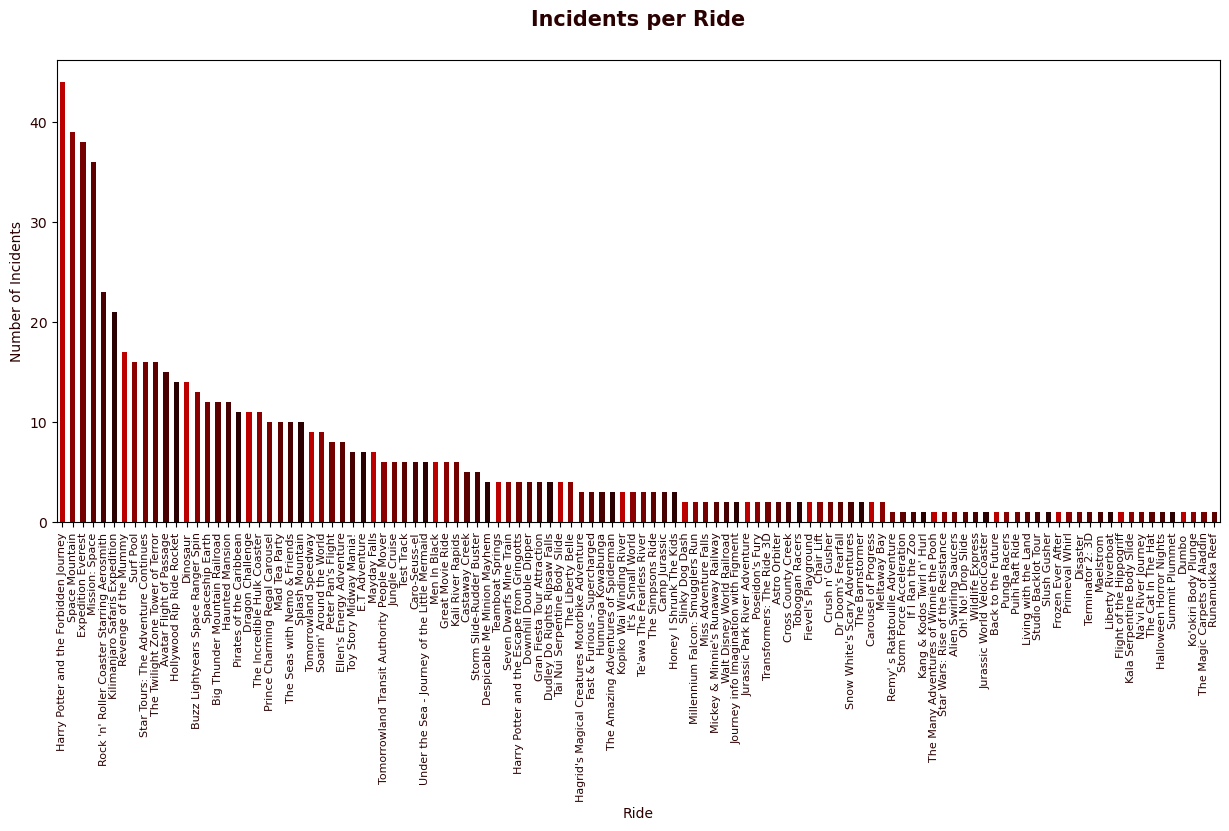

<Figure size 640x480 with 0 Axes>

In [64]:
# Count incidents per ride
ride_counts = incident_data['Ride_Name'].value_counts()

#Set list of colors for formatting
color = ['#BC0000', '#8b0000', '#740000', '#5C0000', '#480000', '#2A0000']

# Create a bar chart and format using Matplotlib
plt.figure(figsize=(15, 6))
ride_counts.plot(kind='bar', color= color)
plt.title('Incidents per Ride', pad = 25, fontsize=15, color=('#2A0000'), weight='bold')
plt.xlabel('Ride', color=('#2A0000'))
plt.ylabel('Number of Incidents', color=('#2A0000'))
plt.xticks(rotation=90, fontsize=8, color=('#2A0000'))
plt.yticks(color=('#2A0000'))
plt.show()

# Save image
plt.savefig('incidents_per_ride.png')


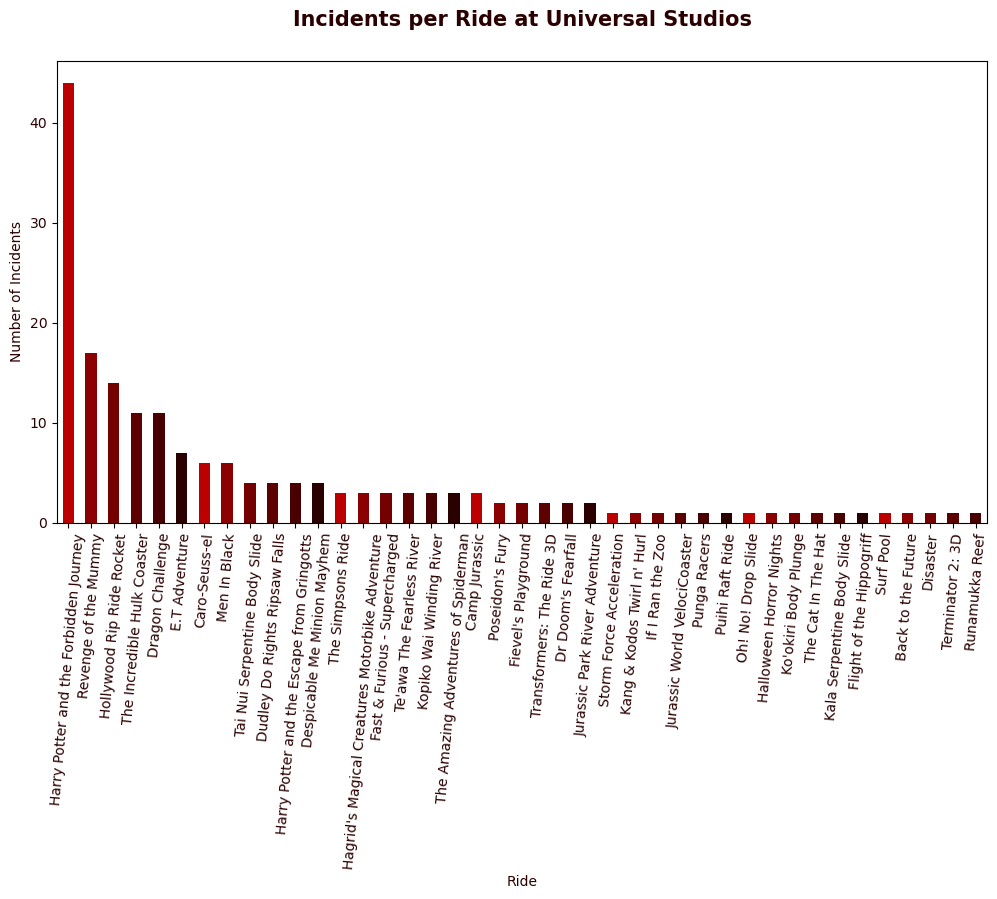

<Figure size 640x480 with 0 Axes>

In [65]:
# Filter the data for incidents at Universal Studios
universal_df = incident_data[incident_data['Company'] == 'Universal']

# Count number of incidents per ride
ride_counts_universal = universal_df['Ride_Name'].value_counts()

#Set list of colors for formatting
color = ['#BC0000', '#8b0000', '#740000', '#5C0000', '#480000', '#2A0000']

# Create a bar chart and format using Matplotlib
plt.figure(figsize=(12, 6))
ride_counts_universal.plot(kind='bar', color = color)
plt.title('Incidents per Ride at Universal Studios',  pad = 25, fontsize=15, color=('#2A0000'), weight='bold')
plt.xlabel('Ride', color=('#2A0000'))
plt.ylabel('Number of Incidents', color=('#2A0000'))
plt.xticks(rotation=85, color=('#2A0000'))
plt.yticks(color=('#2A0000'))
plt.show()

# Save image
plt.savefig('universal_incidents_per_ride.png')

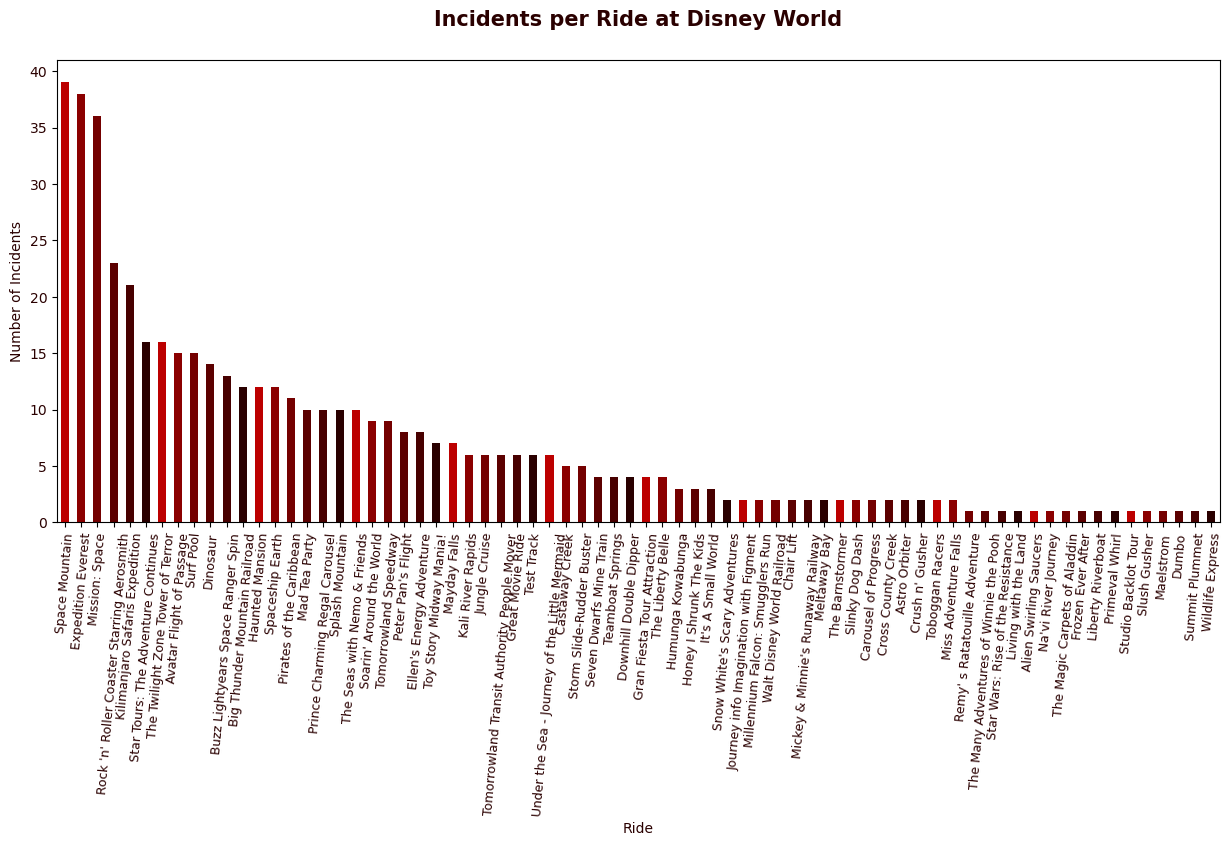

<Figure size 640x480 with 0 Axes>

In [66]:
# Filter the data for incidents at Disney World
disney_df = incident_data[incident_data['Company'] == 'Disney World']

# Count number of incidents per ride
ride_counts_disney = disney_df['Ride_Name'].value_counts()

#Set list of colors for formatting
color = ['#BC0000', '#8b0000', '#740000', '#5C0000', '#480000', '#2A0000']

# Create a bar chart and format using Matplotlib
plt.figure(figsize=(15, 6))
ride_counts_disney.plot(kind='bar', color = color)
plt.title('Incidents per Ride at Disney World', pad = 25, fontsize=15, color=('#2A0000'), weight='bold')
plt.xlabel('Ride', color=('#2A0000'))
plt.ylabel('Number of Incidents', color=('#2A0000'))
plt.xticks(rotation=85, color=('#2A0000'), fontsize=9)
plt.yticks(color=('#2A0000'))
plt.show()

# Save image
plt.savefig('disney_incidents_per_ride.png')

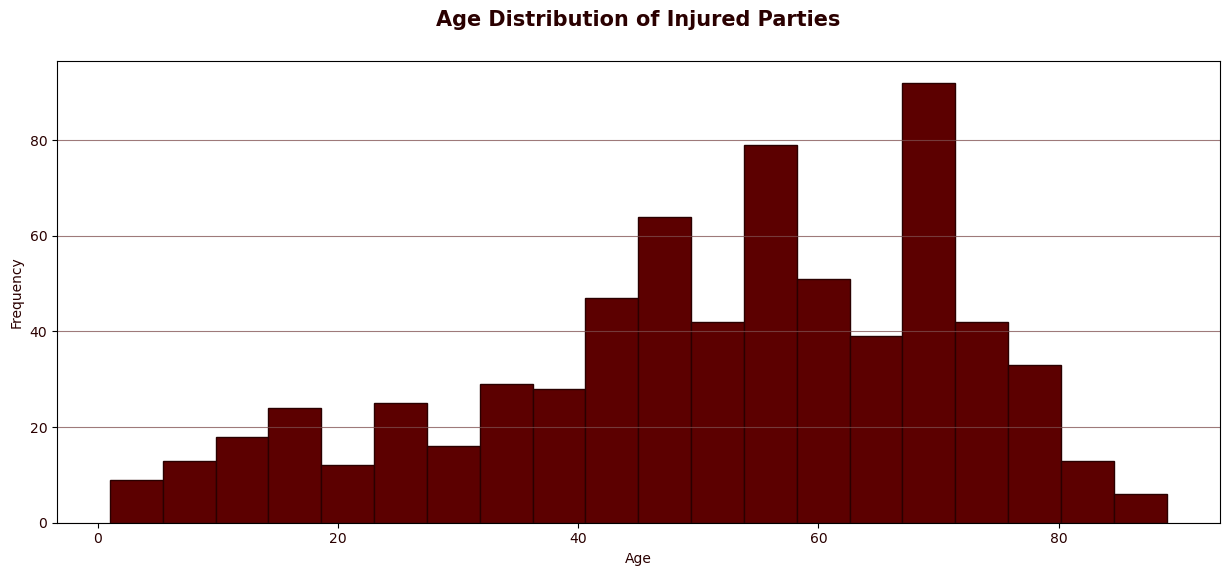

<Figure size 640x480 with 0 Axes>

In [72]:
#Filter incidents by ages of injured parties
age_data = incident_data['Age']

##color = ['#BC0000', '#8b0000', '#740000', '#5C0000', '#480000', '#2A0000']
##edgecolor = ['#2A0000', '#480000', '#5C0000', '#740000', '#8b0000', '#BC0000']

# Create a histogram to show the age distribution
plt.figure(figsize=(15, 6))
plt.hist(age_data, bins=20, color= '#5C0000', edgecolor= '#2A0000')
plt.title('Age Distribution of Injured Parties', pad = 25, fontsize=15, color=('#2A0000'), weight='bold')
plt.xlabel('Age', color=('#2A0000'))
plt.ylabel('Frequency', color=('#2A0000'))
plt.grid(axis='y', alpha=0.75, color='#7E4E4E')
plt.xticks(color=('#2A0000'))
plt.yticks(color=('#2A0000'))
plt.show()

# Save image
plt.savefig('age_histogram.png')

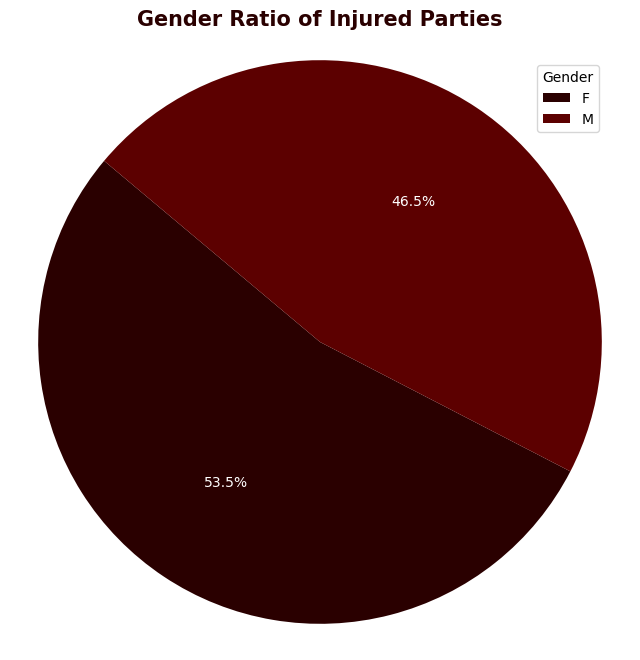

<Figure size 640x480 with 0 Axes>

In [68]:
#Count injured parties by gender
gender_count = incident_data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, colors=['#2A0000', '#5C0000'], textprops={'color':"w"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Gender Ratio of Injured Parties', fontsize=15, color=('#2A0000'), weight='bold')
plt.legend(title="Gender", bbox_to_anchor=(.85, .95), loc='upper left', borderaxespad=0)
plt.show()

# Save image
plt.savefig('gender_pie.png')

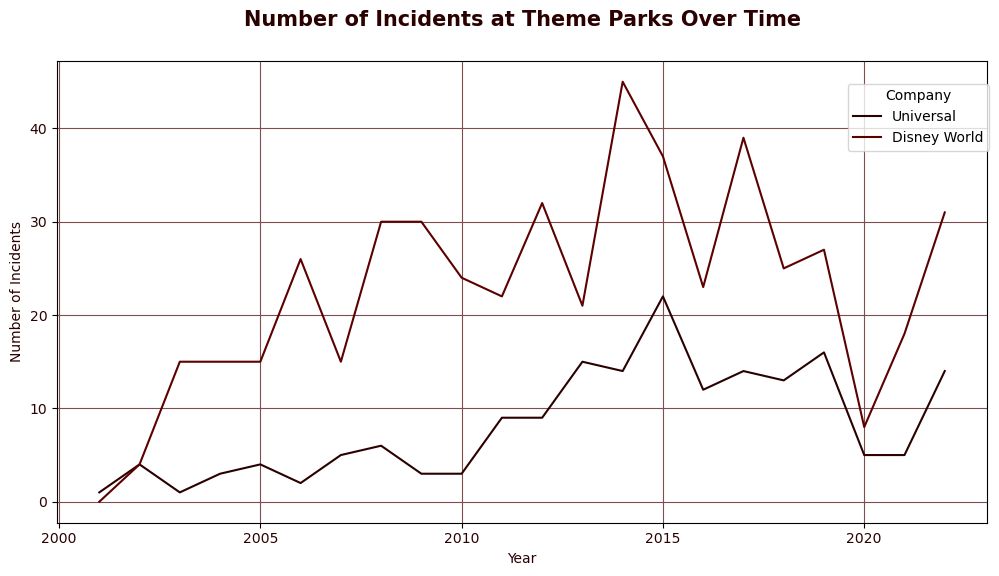

<Figure size 640x480 with 0 Axes>

In [69]:
# Convert Incident_Date column to datetime
incident_data['Incident_Date'] = pd.to_datetime(incident_data['Incident_Date'])

# Extract the year from the incident dates
incident_data['Year'] = incident_data['Incident_Date'].dt.year

# Group the data by year and calculate the total number of incidents per year
yearly_incidents = incident_data.groupby(['Year', 'Company']).size().unstack().fillna(0)

# Create a line graph for each company
plt.figure(figsize=(12, 6))
plt.plot(yearly_incidents.index, yearly_incidents['Universal'], label='Universal', color='#2A0000')
plt.plot(yearly_incidents.index, yearly_incidents['Disney World'], label='Disney World', color='#5C0000')
plt.xlabel('Year', color='#2A0000')
plt.ylabel('Number of Incidents', color='#2A0000')
plt.title('Number of Incidents at Theme Parks Over Time', pad = 25, fontsize=15, color=('#2A0000'), weight='bold')
plt.xticks(color=('#2A0000'))
plt.yticks(color=('#2A0000'))
plt.grid(True, color='#7E4E4E')
plt.legend(title="Company", bbox_to_anchor=(.85, .95), loc='upper left', borderaxespad=0)
plt.show()

# Save image
plt.savefig('incidents_over_time.png')

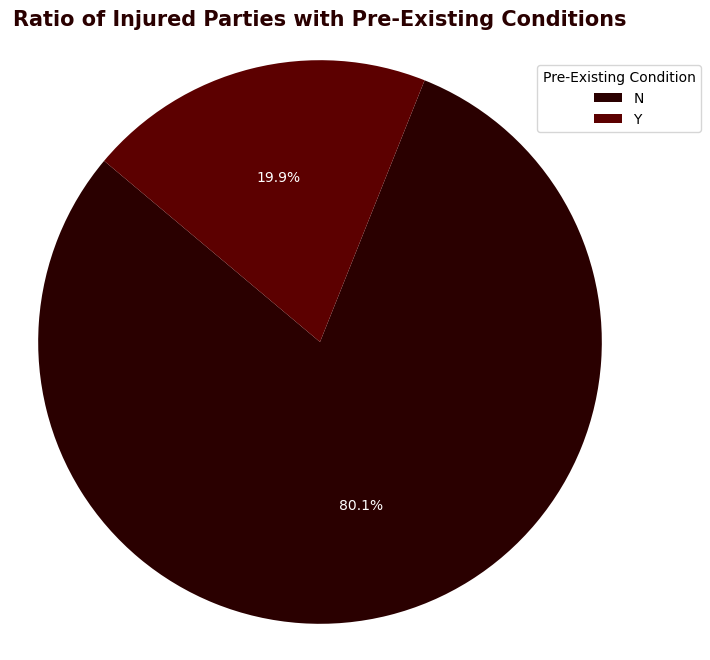

<Figure size 640x480 with 0 Axes>

In [70]:
#Count injured parties that had pre-existing conditions
pre_existing_condition = incident_data['Pre_Existing_Condition'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pre_existing_condition, labels=pre_existing_condition.index, autopct='%1.1f%%', startangle=140, colors=['#2A0000', '#5C0000'], textprops={'color':"w"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratio of Injured Parties with Pre-Existing Conditions', fontsize=15, color=('#2A0000'), weight='bold')
plt.legend(title="Pre-Existing Condition", bbox_to_anchor=(.85, .95), loc='upper left', borderaxespad=0)
plt.show()

# Save image
plt.savefig('pre_existing_condition_pie.png')

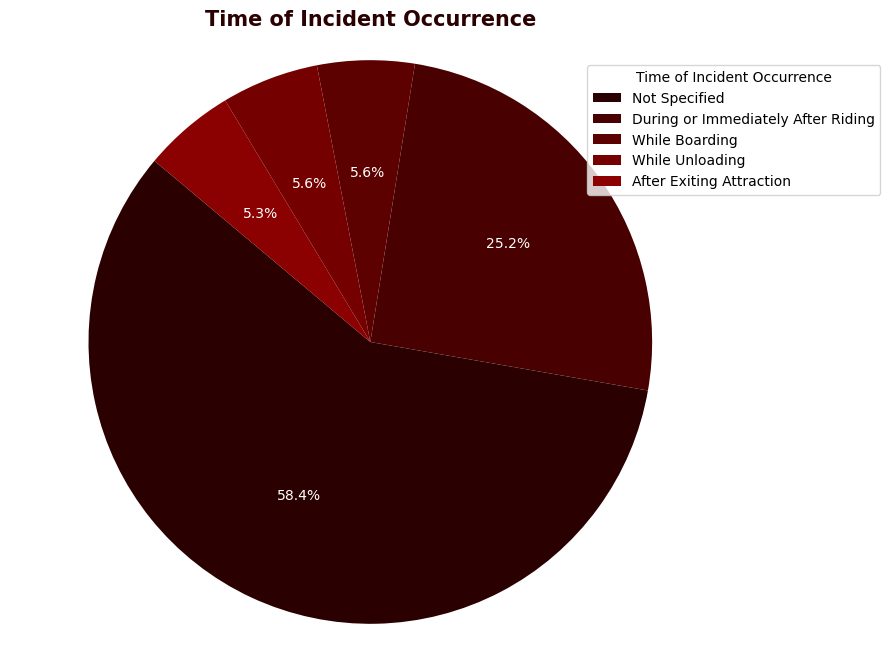

<Figure size 640x480 with 0 Axes>

In [71]:
#Count incidents based on time of incident occurence
Before_During_After = incident_data['Before_During_After'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Before_During_After, labels=Before_During_After.index, autopct='%1.1f%%', startangle=140, colors=['#2A0000', '#480000', '#5C0000', '#740000', '#8b0000'], textprops={'color':"w"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Time of Incident Occurrence', fontsize=15, color=('#2A0000'), weight='bold')
plt.legend(title="Time of Incident Occurrence", bbox_to_anchor=(.85, .95), loc='upper left', borderaxespad=0)
plt.show()

# Save image
plt.savefig('before_during_after_pie.png')